In [120]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('ggplot')  # optional: for ggplot-like style

In [122]:
amazon = pd.read_csv('/content/drive/MyDrive/Amazon Customer Behavior Survey.csv')
amazon

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2023/06/12 4:02:02 PM GMT+5:30,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,...,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,3,4,Competitive prices,Customer service responsiveness
598,2023/06/12 4:02:53 PM GMT+5:30,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,...,Sometimes,Yes,Heavily,Sometimes,3,Sometimes,3,3,Product recommendations,Reducing packaging waste
599,2023/06/12 4:03:59 PM GMT+5:30,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,...,Sometimes,Yes,Occasionally,Sometimes,3,Sometimes,2,3,Wide product selection,Product quality and accuracy
600,2023/06/12 9:57:20 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,...,Sometimes,No,Heavily,Yes,2,Yes,2,2,Wide product selection,Product quality and accuracy


In [123]:
amazon.shape

(602, 23)

In [124]:
amazon.dtypes

Timestamp                                 object
age                                        int64
Gender                                    object
Purchase_Frequency                        object
Purchase_Categories                       object
Personalized_Recommendation_Frequency     object
Browsing_Frequency                        object
Product_Search_Method                     object
Search_Result_Exploration                 object
Customer_Reviews_Importance                int64
Add_to_Cart_Browsing                      object
Cart_Completion_Frequency                 object
Cart_Abandonment_Factors                  object
Saveforlater_Frequency                    object
Review_Left                               object
Review_Reliability                        object
Review_Helpfulness                        object
Personalized_Recommendation_Frequency      int64
Recommendation_Helpfulness                object
Rating_Accuracy                            int64
Shopping_Satisfactio

In [125]:
purchase_frequency_mapping = {
    'Few times a month': 3,
    'Once a month': 2,
    'Less than once a month': 1,
    'Multiple times a week': 5,
    'Once a week': 4
}
personalized_recommendation_frequency_mapping = {
    'Yes': 3,
    'Sometimes': 2,
    'No': 1,
}


# Creating the 'Purchase_Frequency_Num' column based on the mapping
amazon['Purchase_Frequency_Num'] = amazon['Purchase_Frequency'].map(purchase_frequency_mapping)
amazon['Personalized_Recommendation_Frequency_Num'] = amazon['Purchase_Frequency'].map(purchase_frequency_mapping)

amazon.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,Purchase_Frequency_Num,Personalized_Recommendation_Frequency_Num
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste,3,3
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste,2,2
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy,3,3
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy,2,2
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy,1,1


1. Does purchase frequency correlate with the age of Amazon shoppers?

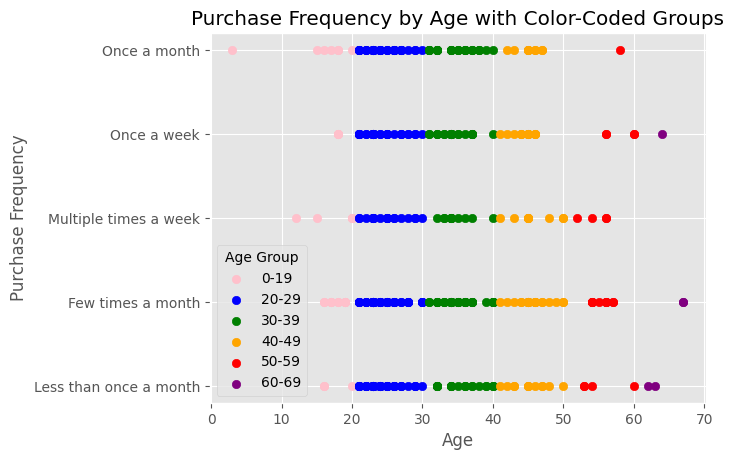

In [126]:
bins = [0,20, 30, 40, 50, 60,70]  # Define bins for age groups
labels = ['0-19','20-29', '30-39', '40-49', '50-59', '60-69']  # Labels for age groups
amazon['Age_Group'] = pd.cut(amazon['age'], bins=bins, labels=labels)

# Define colors for each age group
colors = {'0-19':'pink', '20-29': 'blue', '30-39': 'green', '40-49': 'orange', '50-59': 'red', '60-69': 'purple'}

# Plotting scatter plot with color-coded groups

for group, color in colors.items():
    subset = amazon[amazon['Age_Group'] == group]
    plt.scatter(subset['age'], subset['Purchase_Frequency'], color=color, label=group)

plt.title('Purchase Frequency by Age with Color-Coded Groups')
plt.xlabel('Age')
plt.ylabel('Purchase Frequency')
plt.legend(title='Age Group')

2. What are the predominant product categories purchased by different age groups and genders?

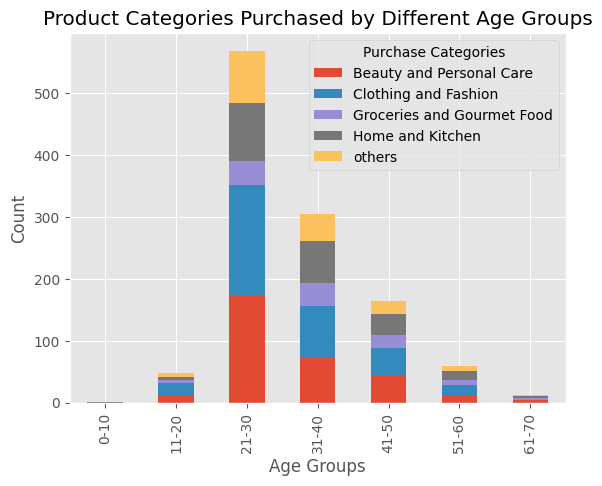

In [127]:
# Create seven age groups from 0 to 70
bins = [0, 10, 20, 30, 40, 50, 60, 70]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70']

amazon['Age_Groups'] = pd.cut(amazon['age'], bins=bins, labels=labels, right=False)

temp = amazon
temp['Purchase_Categories'] = temp['Purchase_Categories'].str.split(';')
temp = temp.explode('Purchase_Categories')

# Count occurrences of each category for different age groups
age_category_counts = temp.groupby(['Age_Groups', 'Purchase_Categories']).size().unstack(fill_value=0)

# Plotting grouped bar chart for different age groups
age_category_counts.plot(kind='bar', stacked=True)
plt.title('Product Categories Purchased by Different Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.legend(title='Purchase Categories')


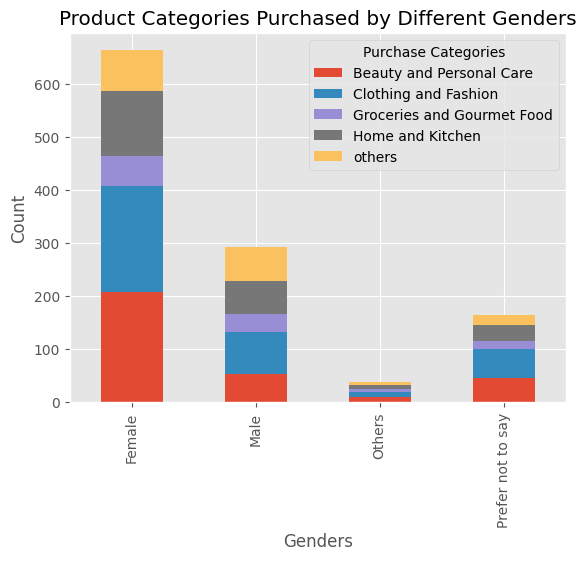

In [128]:
# Count occurrences of each category for different genders
gender_category_counts = temp.groupby(['Gender', 'Purchase_Categories']).size().unstack(fill_value=0)

# Plotting grouped bar chart for different genders
gender_category_counts.plot(kind='bar', stacked=True)
plt.title('Product Categories Purchased by Different Genders')
plt.xlabel('Genders')
plt.ylabel('Count')
plt.legend(title='Purchase Categories')

3. Is there a correlation between personalized recommendation frequency and purchase frequency?

Correlation Coefficient: nan


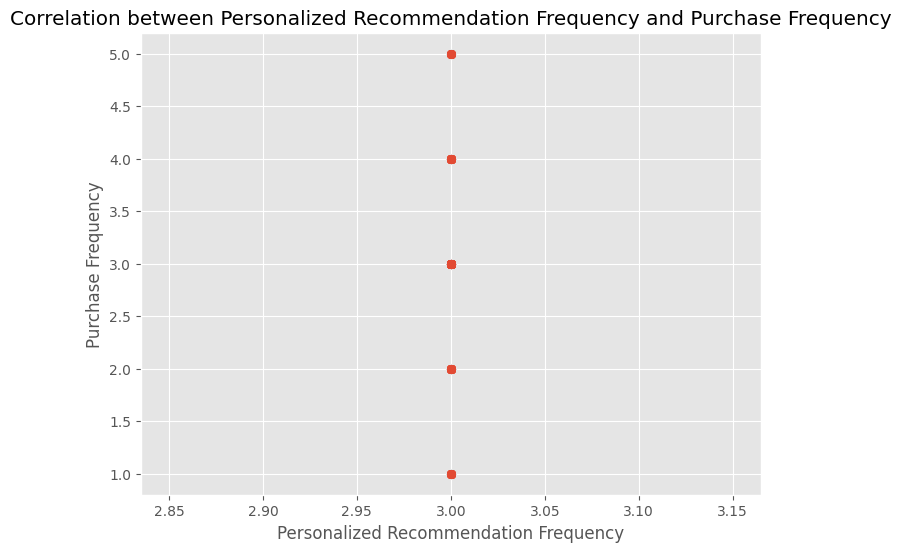

In [129]:
frequency_mapping = {
    'Few times a month': 3,
    'Once a month': 2,
    'Less than once a month': 1,
    'Multiple times a week': 5,
    'Once a week' : 4,
}

amazon['Purchase_Frequency_Num'] = amazon['Purchase_Frequency'].map(frequency_mapping)
amazon['Personalized_Recommendation_Frequency_Num'] = amazon['Personalized_Recommendation_Frequency'].map({
    'Never': 1,
    'Rarely': 2,
    'Sometimes': 3,
    'Often': 4,
    'Always': 5,
})

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(amazon['Personalized_Recommendation_Frequency_Num'], amazon['Purchase_Frequency_Num'], alpha=0.5)
plt.title('Correlation between Personalized Recommendation Frequency and Purchase Frequency')
plt.xlabel('Personalized Recommendation Frequency')
plt.ylabel('Purchase Frequency')

# Calculate the correlation coefficient
correlation_coefficient = amazon['Personalized_Recommendation_Frequency_Num'].corr(amazon['Purchase_Frequency_Num'])
print(f"Correlation Coefficient: {correlation_coefficient}")


4. How do browsing frequency and search result exploration methods relate to cart abandonment rates?

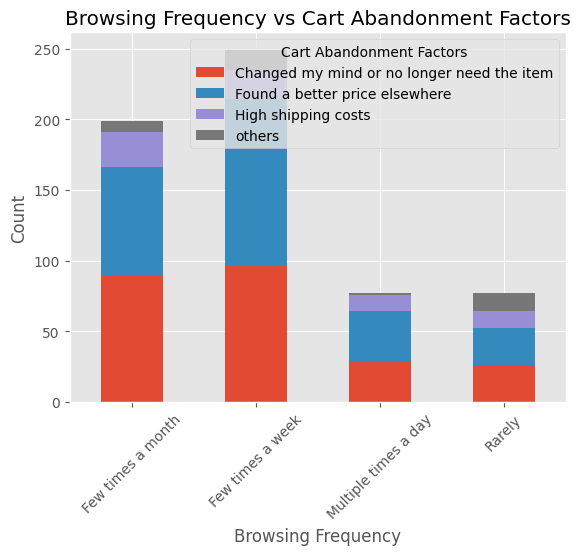

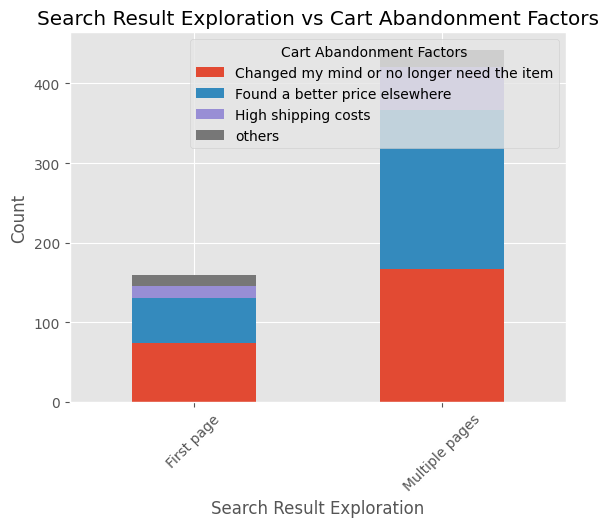

In [130]:
# Stacked bar chart for Browsing Frequency vs Cart Abandonment
browsing_cart_abandonment = pd.crosstab(index=amazon['Browsing_Frequency'], columns=amazon['Cart_Abandonment_Factors'])
browsing_cart_abandonment.plot(kind='bar', stacked=True)
plt.title('Browsing Frequency vs Cart Abandonment Factors')
plt.xlabel('Browsing Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cart Abandonment Factors', loc='upper right')

# Stacked bar chart for Search Result Exploration vs Cart Abandonment
search_cart_abandonment = pd.crosstab(index=amazon['Search_Result_Exploration'], columns=amazon['Cart_Abandonment_Factors'])
search_cart_abandonment.plot(kind='bar', stacked=True)
plt.title('Search Result Exploration vs Cart Abandonment Factors')
plt.xlabel('Search Result Exploration')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cart Abandonment Factors', loc='upper right')


5. What factors contribute most to cart abandonment, and do they vary across different product categories?

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Found a better price elsewhere'),
  Text(1, 0, 'Changed my mind or no longer need the item'),
  Text(2, 0, 'High shipping costs'),
  Text(3, 0, 'others')])

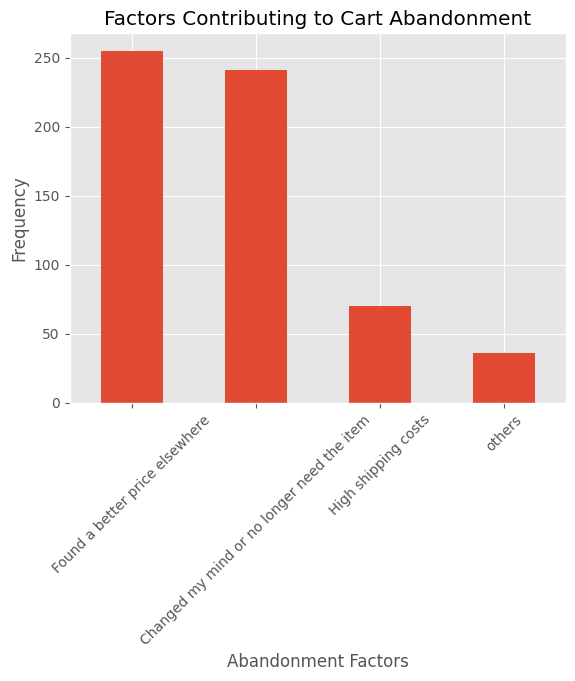

In [131]:
abandonment_factors_count = amazon['Cart_Abandonment_Factors'].value_counts()

# Plotting the factors contributing to cart abandonment
abandonment_factors_count.plot(kind='bar')
plt.title('Factors Contributing to Cart Abandonment')
plt.xlabel('Abandonment Factors')
plt.ylabel('Frequency')
plt.xticks(rotation=45)


6. Do customers who frequently leave reviews tend to rely more on reviews in their purchasing decisions?

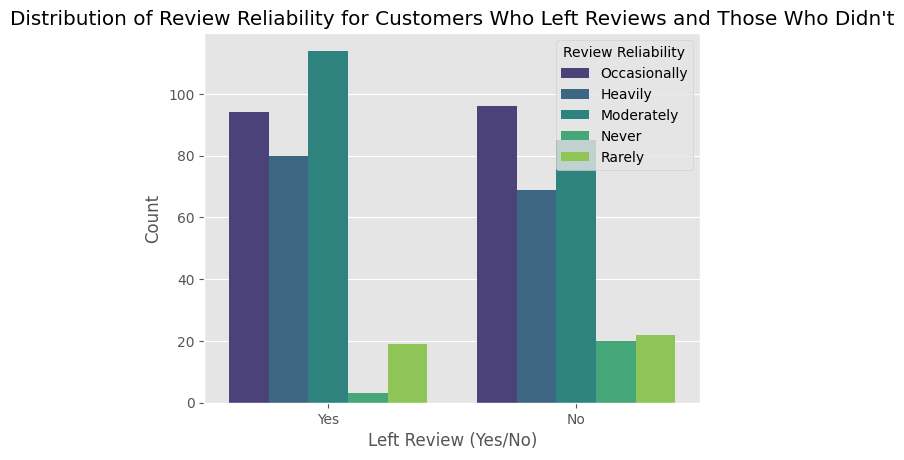

In [132]:
# Select relevant columns for analysis
relevant_columns = ['Review_Left', 'Review_Reliability']

# Create a subset of the data with relevant columns
subset_data = amazon[relevant_columns]

# Plotting a count plot to visualize the distribution of review reliability for customers who left reviews and those who didn't
sns.countplot(data=subset_data, x='Review_Left', hue='Review_Reliability', palette='viridis')
plt.title('Distribution of Review Reliability for Customers Who Left Reviews and Those Who Didn\'t')
plt.xlabel('Left Review (Yes/No)')
plt.ylabel('Count')
plt.legend(title='Review Reliability')


7. Are customers satisfied with the relevance and accuracy of personalized recommendations received from Amazon?

(array([0, 1, 2]),
 [Text(0, 0, 'Sometimes'), Text(1, 0, 'No'), Text(2, 0, 'Yes')])

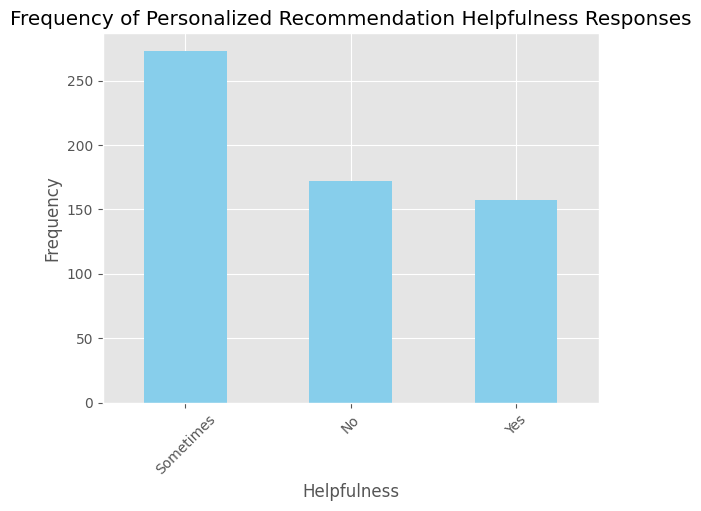

In [133]:
recommendation_helpfulness_counts = amazon['Recommendation_Helpfulness'].value_counts()

# Plotting the counts of different responses for recommendation helpfulness
recommendation_helpfulness_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Personalized Recommendation Helpfulness Responses')
plt.xlabel('Helpfulness')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed


8. Which aspects of Amazon's services are most appreciated by customers across different age groups and genders?

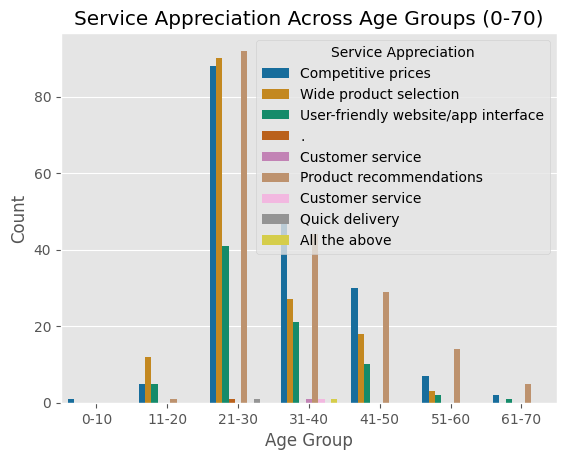

In [134]:
grouped_data = amazon.groupby(['age', 'Gender'])['Service_Appreciation'].value_counts()

grouped_data = grouped_data.unstack()

# Create bar plot for different age groups
bins = [0, 10, 20, 30, 40, 50, 60, 70]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70']

# Create a new column 'Age_Group' based on the defined bins
amazon['Age_Group'] = pd.cut(amazon['age'], bins=bins, labels=labels, right=False)

# Now, visualize the service appreciation across age groups
sns.countplot(data=amazon, x='Age_Group', hue='Service_Appreciation', palette='colorblind')
plt.title('Service Appreciation Across Age Groups (0-70)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Service Appreciation')



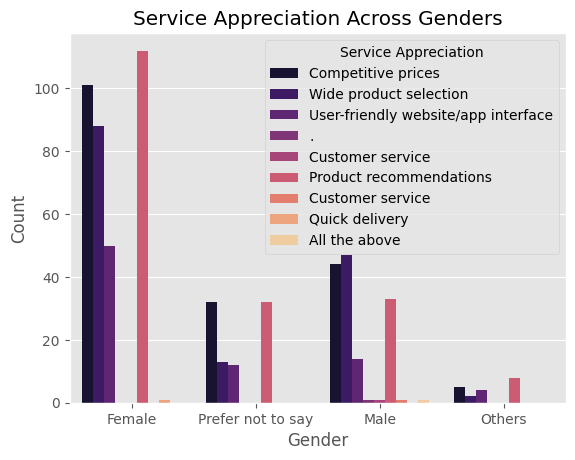

In [135]:
# Create bar plot for different genders
sns.countplot(data=amazon, x='Gender', hue='Service_Appreciation', palette='magma')
plt.title('Service Appreciation Across Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Service Appreciation')


9. Do users who frequently save items for later purchase tend to revisit and complete those purchases?

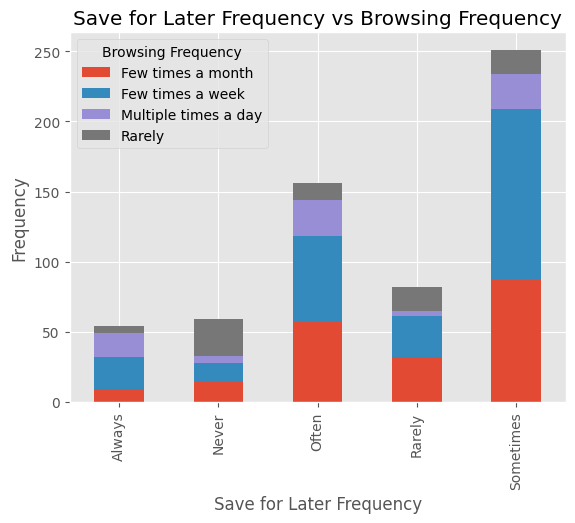

In [136]:
cross_table = pd.crosstab(amazon['Saveforlater_Frequency'], amazon['Browsing_Frequency'])

# Plotting a bar chart
cross_table.plot(kind='bar', stacked=True)
plt.title('Save for Later Frequency vs Browsing Frequency')
plt.xlabel('Save for Later Frequency')
plt.ylabel('Frequency')
plt.legend(title='Browsing Frequency')


10. How does overall shopping satisfaction correlate with factors such as review helpfulness, recommendation helpfulness, and service appreciation?

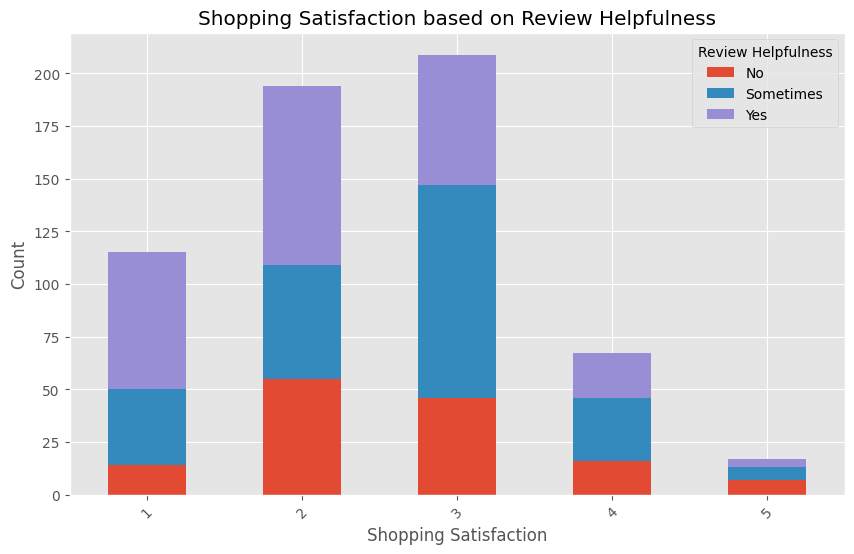

In [137]:
pivot_data = amazon.groupby(['Shopping_Satisfaction', 'Review_Helpfulness']).size().unstack()

# Plotting a stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Shopping Satisfaction based on Review Helpfulness')
plt.xlabel('Shopping Satisfaction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Review Helpfulness')
